In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime


In [2]:
# Load the dataset 
nifty_data = pd.read_csv('NSEI.csv')

# Display the first few rows of the dataset
nifty_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [4]:
# Convert 'Date' column to datetime format (assuming the format is "YYYY-MM-DD")
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format='%Y-%m-%d')

# Handle missing values if any
nifty_data.dropna(inplace=True)


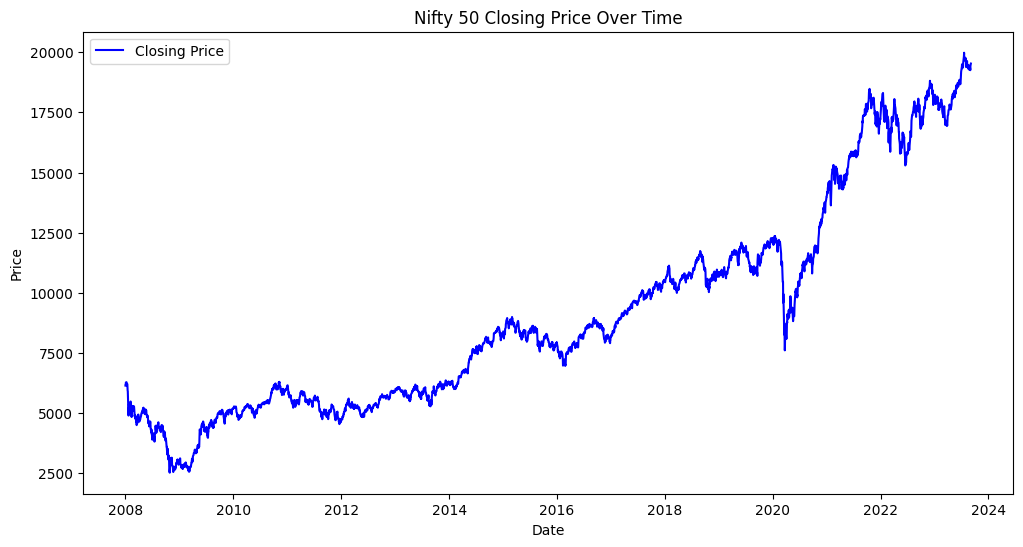

In [5]:
# Visualize stock price trends over time
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Closing Price', color='blue')
plt.title('Nifty 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
# Create lag features (e.g., previous day's closing price)
nifty_data['Prev_Close'] = nifty_data['Close'].shift(1)

# Calculate technical indicators (e.g., 50-day moving average)
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()


In [7]:
# Select relevant features for modeling
features = ['Prev_Close', 'SMA_50']  # Add more features as needed

# Split data into training and testing sets
X = nifty_data[features]
y = nifty_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [11]:
# Fill missing values with the mean of the respective column
nifty_data.fillna(nifty_data.mean(), inplace=True)


In [13]:
# Select relevant features for modeling
features = ['Prev_Close', 'SMA_50']  # Add more features as needed

# Split data into training and testing sets
X = nifty_data[features]
y = nifty_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


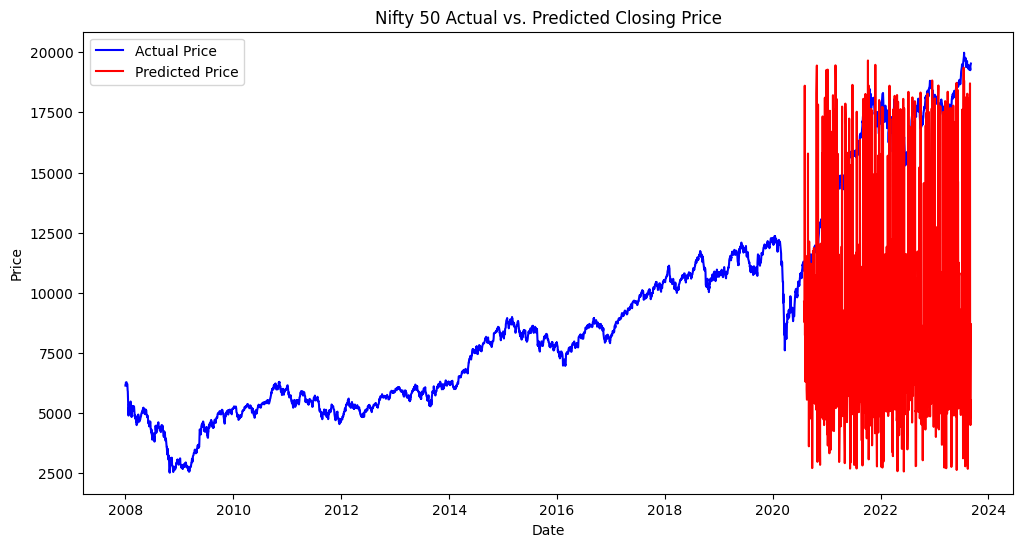

In [16]:
# Visualize actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Actual Price', color='blue')
plt.plot(nifty_data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Price', color='red')
plt.title('Nifty 50 Actual vs. Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:
# Cell 9: Model evaluation

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the R-squared (R2) score
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.9987811173233498


In [19]:
# Cell 9: Model evaluation

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert R2 score to percentage
accuracy_percentage = r2 * 100

# Display the accuracy as a percentage
print("Accuracy:", accuracy_percentage, "%")


Accuracy: 99.87811173233499 %
